In [2]:
# Questions to answer
# Number of flights to each location for each month, to see which month(or weekend) is most popular: 
# Which company provides the most flights to a specific location ( e.g. easyJet/Ryanair): Bar graph
# Which tourist company gives provides the most flights to a specific location ( e.g. easyJet/Ryanair): Bar graph 


import pandas as pd
import datetime
from datetime import datetime, time

# Load the CSV file into a DataFrame
berlin_df = pd.read_csv('../Data_API/dep_flights/depFlight_0320/berlin_0320.csv')
berlin_df['week'] = pd.to_datetime(berlin_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 


# 2023-06-02T14:20:00

# Print the first 5 rows of the DataFrame
display(berlin_df.head())


,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,is_carrier,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount,week
0,13465-2306021325--32480-0-9828-2306021605,13465-2306021325--32480-0-9828-2306021605,London City,LCY,Berlin Brandenburg,BER,100,2023-06-02T13:25:00,2023-06-02T16:05:00,British Airways,...,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,111.52,22
1,13542-2306020640--32356-0-9828-2306020940,13542-2306020640--32356-0-9828-2306020940,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T06:40:00,2023-06-02T09:40:00,easyJet,...,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,103.99,22
2,13542-2306020845--32356-0-9828-2306021145,13542-2306020845--32356-0-9828-2306021145,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T08:45:00,2023-06-02T11:45:00,easyJet,...,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,165.99,22
3,13465-2306020825--32480-0-9828-2306021110,13465-2306020825--32480-0-9828-2306021110,London City,LCY,Berlin Brandenburg,BER,105,2023-06-02T08:25:00,2023-06-02T11:10:00,British Airways,...,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,118.52,22
4,13554-2306020650--32480-0-9828-2306020940,13554-2306020650--32480-0-9828-2306020940,London Heathrow,LHR,Berlin Brandenburg,BER,110,2023-06-02T06:50:00,2023-06-02T09:40:00,British Airways,...,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,125.58,22


In [3]:

selected_cols_q1 = berlin_df[['depFlight_id', 'depFlight_name', 'week']]
# display(selected_cols)
print(selected_cols_q1.shape) 


bl_flight_name_week = selected_cols_q1.groupby(['depFlight_name', 'week']).size().unstack('depFlight_name').reset_index()
display(bl_flight_name_week)






(286, 3)


depFlight_name,week,British Airways,Ryanair,easyJet
0,22,11,3,4
1,23,10,3,4
2,24,8,3,4
3,25,8,3,4
4,26,8,3,4
5,27,9,3,4
6,28,9,3,4
7,29,9,3,4
8,30,9,3,4
9,31,9,3,4


depFlight_name,week,British Airways,Ryanair,easyJet
0,22,11,3,4
1,23,10,3,4
2,24,8,3,4
3,25,8,3,4
4,26,8,3,4
5,27,9,3,4
6,28,9,3,4
7,29,9,3,4
8,30,9,3,4
9,31,9,3,4


/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


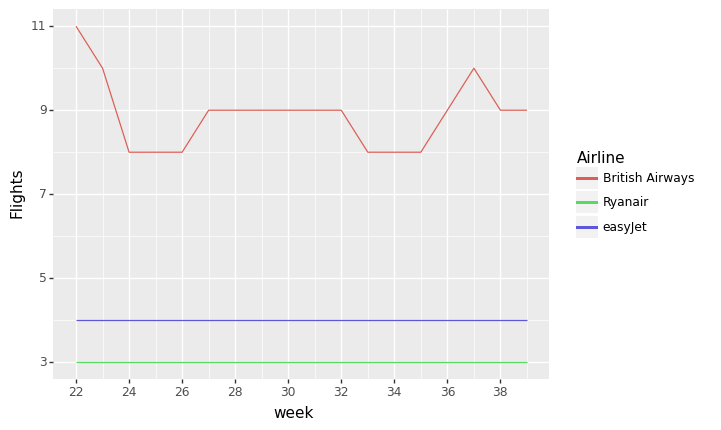

<ggplot: (8767652688463)>

In [4]:

flightname_week_df = pd.DataFrame(bl_flight_name_week)
display(flightname_week_df)



# from plotnine import ggplot, aes, geom_line, geom_point

from plotnine import *

# Stack columns into long format
df_plot_one = pd.melt(flightname_week_df, id_vars=['week'], value_vars=['British Airways', 'Ryanair', 'easyJet'], var_name='Airline', value_name='Flights')

# Create plot
# ggplot(df, aes(x='week', y='Flights', color='Airline')) + geom_line()
ggplot(df_plot_one, aes(x='week', y='Flights', color='Airline')) + geom_line() + \
scale_x_continuous(breaks=range(df_plot_one['week'].min(), df_plot_one['week'].max()+1, 2)) + \
scale_y_continuous(breaks=range(df_plot_one['Flights'].min(), df_plot_one['Flights'].max()+1, 2))





,depFlight_name,week,price_amount
0,British Airways,22,140
1,British Airways,23,169
2,British Airways,24,208
3,British Airways,25,135
4,British Airways,26,146
5,British Airways,27,188
6,British Airways,28,205
7,British Airways,29,176
8,British Airways,30,171
9,British Airways,31,155


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_98267/4193838218.py:18: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.ise

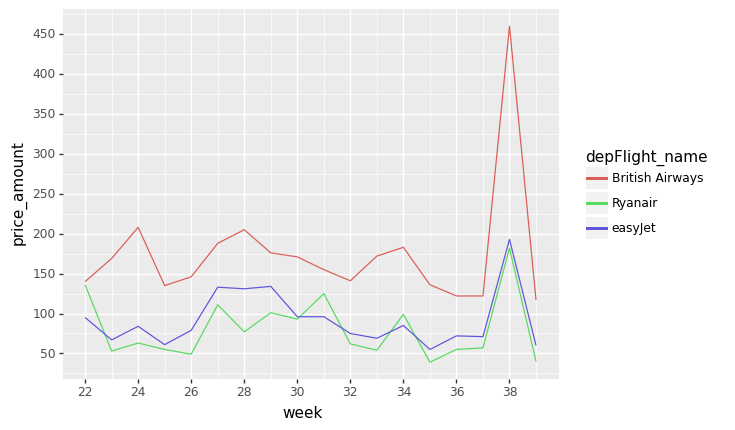

<ggplot: (8767619511947)>

In [5]:
selected_cols_price = berlin_df[['depFlight_id', 'depFlight_name', 'week', 'price_amount']]
# display(selected_cols)
# print(selected_cols_price.shape) 


bl_flight_name_week_two = selected_cols_price.groupby(['depFlight_name', 'week']).mean('price_amount').astype(int).reset_index()

# bl_flight_name_week_two = selected_cols_price.groupby(['depFlight_name', 'week']).mean('price_amount').unstack('depFlight_name').astype(int)


# bl_flight_name_week_two = selected_cols_price.groupby(['depFlight_name', 'week']).mean('price_amount').astype(int)
display(bl_flight_name_week_two)


from plotnine import ggplot, aes, geom_line, scale_x_continuous, scale_y_continuous

# Reshape the data from wide to long format
df_long = bl_flight_name_week_two.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')

# Create the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
 # Add a line for each airline using geom_line
 + geom_line()
 # Set the number of x and y axis ticks to 10
 + scale_x_continuous(breaks=range(bl_flight_name_week_two['week'].min(), bl_flight_name_week_two['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, bl_flight_name_week_two['price_amount'].max()+1, 50))
)


# df_plot_2 = pd.melt(flightname_week_df, id_vars=['week'], value_vars=['British Airways', 'Ryanair', 'easyJet'], var_name='Airline', value_name='Price')

# # Create plot
# # ggplot(df, aes(x='week', y='Flights', color='Airline')) + geom_line()
# ggplot(df_plot_2, aes(x='week', y='Flights', color='Airline')) + geom_line() + \
# scale_x_continuous(breaks=range(df_plot_2['week'].min(), df_plot_2['week'].max()+1, 2)) + \
# scale_y_continuous(breaks=range(df_plot_2['Price'].min(), df_plot_2['Price'].max()+1, 2))



,depFlight_id,week,booking_agent,price_amount
0,13465-2306021325--32480-0-9828-2306021605,22,Worldairfares,111.52
1,13542-2306020640--32356-0-9828-2306020940,22,easyJet,103.99
2,13542-2306020845--32356-0-9828-2306021145,22,easyJet,165.99
3,13465-2306020825--32480-0-9828-2306021110,22,Worldairfares,118.52
4,13554-2306020650--32480-0-9828-2306020940,22,Worldairfares,125.58
...,...,...,...,...
281,13771-2309291420--32356-0-9828-2309291710,39,easyJet,63.99
282,13542-2309290640--32356-0-9828-2309290940,39,easyJet,54.99
283,13542-2309290845--32356-0-9828-2309291145,39,easyJet,67.99
284,13542-2309291930--32356-0-9828-2309292230,39,easyJet,54.99


booking_agent  week  price_amount  British Airways  Lycafly  Trip.com  \
0                22         51.99              NaN      NaN       NaN   
1                22         61.99              NaN      NaN       NaN   
2                22         70.70              NaN      NaN       1.0   
3                22        103.99              NaN      NaN       NaN   
4                22        107.40              NaN      NaN       1.0   
..              ...           ...              ...      ...       ...   
252              39        107.58              NaN      NaN       NaN   
253              39        125.58              NaN      NaN       NaN   
254              39        130.58              NaN      NaN       NaN   
255              39        144.58              NaN      NaN       NaN   
256              39        157.58              NaN      NaN       NaN   

booking_agent  Worldairfares  eDreams  easyJet  travelup  
0                        NaN      NaN      1.0       NaN  
1    

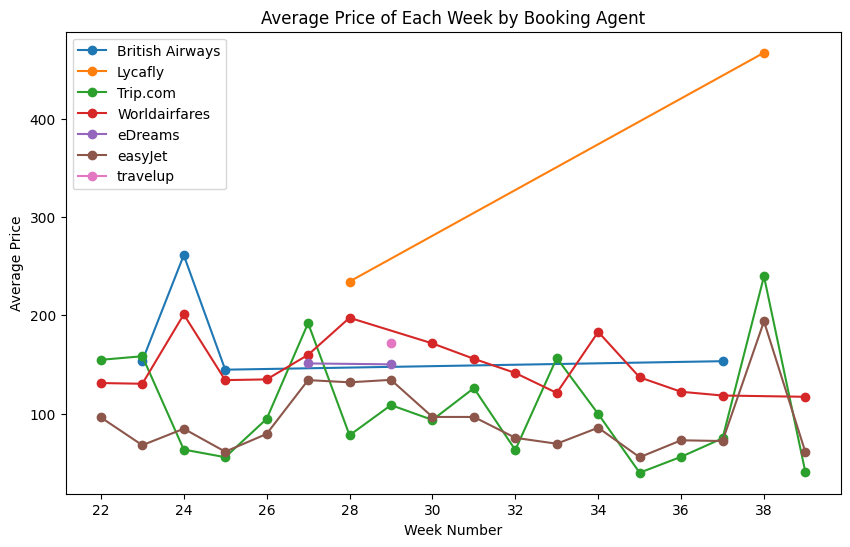

In [6]:
selected_cols_price = berlin_df[['depFlight_id', 'week', 'booking_agent', 'price_amount']]
display(selected_cols_price)

agents_price = selected_cols_price.groupby(['booking_agent', 'week', 'price_amount']).size().unstack('booking_agent').reset_index()
print(agents_price)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.DataFrame(selected_cols_price)


# # Convert the date column to datetime format
# df['date'] = pd.to_datetime(df['date'])

# # Extract the week number
# df['week_number'] = df['date'].dt.isocalendar().week

# Group by booking agent and week number, then calculate the average price
average_prices = df.groupby(['booking_agent', 'week']).agg({'price_amount': np.mean}).reset_index()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

for agent in average_prices['booking_agent'].unique():
    agent_data = average_prices[average_prices['booking_agent'] == agent]
    ax.plot(agent_data['week'], agent_data['price_amount'], label=agent, marker='o')

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Set the x-axis ticks to whole numbers
ax.set_xlabel('Week Number')
ax.set_ylabel('Average Price')
ax.set_title('Average Price of Each Week by Booking Agent')
ax.legend()

plt.show()

# Create a plot
# plt.figure(figsize=(10, 6))
# for agent in average_prices['booking_agent'].unique():
#     agent_data = average_prices[average_prices['booking_agent'] == agent]
#     plt.plot(agent_data['week'], agent_data['price_amount'], label=agent, marker='o')

# plt.xlabel('Week Number')
# plt.ylabel('Average Price')
# plt.title('Average Price of Each Week by Booking Agent')
# plt.legend()
# plt.show()




In [7]:
# Which tourist company gives provides the most flights to a specific location ( e.g. easyJet/Ryanair): Bar graph 
# display(berlin_df.head())

selected_cols_q2 = berlin_df[['depFlight_id', 'depFlight_name', 'week', 'booking_agent']]
# display(selected_cols)
# print(selected_cols.shape) # 3436 rows × 4 columns

display(selected_cols_q2)
# print(selected_cols_nd.shape)


agents = selected_cols_q2.groupby(['booking_agent', 'week']).size().unstack('booking_agent').reset_index()
print(agents)




,depFlight_id,depFlight_name,week,booking_agent
0,13465-2306021325--32480-0-9828-2306021605,British Airways,22,Worldairfares
1,13542-2306020640--32356-0-9828-2306020940,easyJet,22,easyJet
2,13542-2306020845--32356-0-9828-2306021145,easyJet,22,easyJet
3,13465-2306020825--32480-0-9828-2306021110,British Airways,22,Worldairfares
4,13554-2306020650--32480-0-9828-2306020940,British Airways,22,Worldairfares
...,...,...,...,...
281,13771-2309291420--32356-0-9828-2309291710,easyJet,39,easyJet
282,13542-2309290640--32356-0-9828-2309290940,easyJet,39,easyJet
283,13542-2309290845--32356-0-9828-2309291145,easyJet,39,easyJet
284,13542-2309291930--32356-0-9828-2309292230,easyJet,39,easyJet


booking_agent  week  British Airways  Lycafly  Trip.com  Worldairfares  \
0                22              NaN      NaN       5.0            9.0   
1                23              1.0      NaN       5.0            7.0   
2                24              1.0      NaN       3.0            7.0   
3                25              1.0      NaN       3.0            7.0   
4                26              NaN      NaN       4.0            7.0   
5                27              NaN      NaN       4.0            6.0   
6                28              NaN      2.0       3.0            7.0   
7                29              NaN      NaN       2.0            NaN   
8                30              NaN      NaN       3.0            9.0   
9                31              NaN      NaN       3.0            9.0   
10               32              NaN      NaN       3.0            9.0   
11               33              NaN      NaN       6.0            5.0   
12               34              NaN  

booking_agent,week,British Airways,Lycafly,Trip.com,Worldairfares,eDreams,easyJet,travelup
0,22,0.0,0.0,5.0,9.0,0.0,4.0,0.0
1,23,1.0,0.0,5.0,7.0,0.0,4.0,0.0
2,24,1.0,0.0,3.0,7.0,0.0,4.0,0.0
3,25,1.0,0.0,3.0,7.0,0.0,4.0,0.0
4,26,0.0,0.0,4.0,7.0,0.0,4.0,0.0
5,27,0.0,0.0,4.0,6.0,2.0,4.0,0.0
6,28,0.0,2.0,3.0,7.0,0.0,4.0,0.0
7,29,0.0,0.0,2.0,0.0,2.0,4.0,8.0
8,30,0.0,0.0,3.0,9.0,0.0,4.0,0.0
9,31,0.0,0.0,3.0,9.0,0.0,4.0,0.0


week        int64
agent      object
Flights     int64
dtype: object


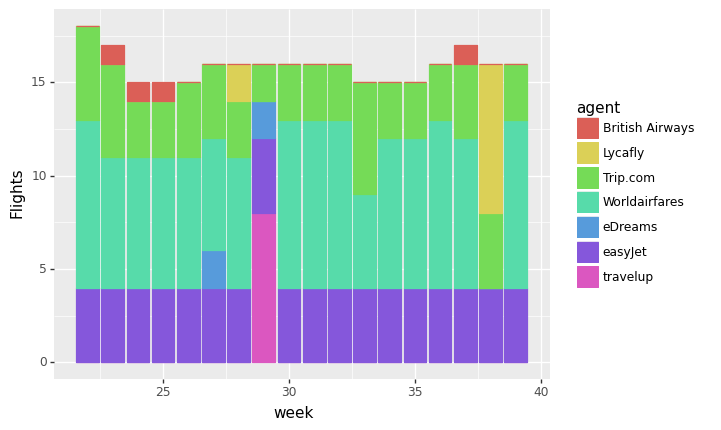

<ggplot: (8767619726400)>

In [8]:
agents_df = pd.DataFrame(agents)
agents_df = agents_df.fillna(0)

display(agents_df)


# import plotnine as p9

from plotnine import *

df_plot_two = pd.melt(agents_df, id_vars=['week'], value_vars=['British Airways',	'Lycafly',	'Trip.com',	'Worldairfares','eDreams',	'easyJet',	'travelup'], var_name='agent', value_name='Flights')
df_plot_two['week'] = df_plot_two['week'].astype(int)
df_plot_two['Flights'] = df_plot_two['Flights'].astype(int)

print(df_plot_two.dtypes)

# ggplot(df_plot_two, aes(x='week', y='Flights', color='agent')) + geom_line() + \
# scale_x_continuous(breaks=range(df_plot_two['week'].min(), df_plot_two['week'].max()+1, 2)) + \
# scale_y_continuous(breaks=range(df_plot_two['Flights'].min(), df_plot_two['Flights'].max()+1, 2))

ggplot(df_plot_two, aes(x='week', y='Flights', color='agent', fill = 'agent')) + \
geom_bar(stat = 'identity')







In [9]:
# Number of flights to each location for each month, to see which month(or weekend) is most popular: 

# display(berlin_df.head())

berlin_df = pd.read_csv('berlin_0320.csv')

athens_df = pd.read_csv('athens_0320.csv')

budapest_df = pd.read_csv('budapest_0320.csv')

lisbon_df = pd.read_csv('lisbon_0320.csv')

madrid_df = pd.read_csv('madrid_0320.csv')

paris_df = pd.read_csv('paris_0320.csv')

rome_df = pd.read_csv('rome_0320.csv')


all_cities = [berlin_df, athens_df, budapest_df, lisbon_df, madrid_df, paris_df, rome_df]
merged_df = pd.concat(all_cities)
merged_df['city'] = merged_df['depFlight_destination.name'].apply(lambda x: x.split()[0])

# display(merged_df)

by_price = merged_df[['city','price_amount']].groupby('city').mean().astype(int)
display(by_price)

by_destination = merged_df[['depFlight_destination.name','price_amount']].groupby('depFlight_destination.name').mean().astype(int)

# by_destination = merged_df[['city']].groupby('city')
display(by_destination)








FileNotFoundError: [Errno 2] No such file or directory: 'berlin_0320.csv'